In [110]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [111]:
dat = np.loadtxt('../data/points_and.csv', delimiter=',', skiprows=1)
data_train = dat[:,:-1]
class_train = dat[:, -1]
print(data_train.shape)
print(class_train.shape)

(4, 2)
(4,)


In [112]:
model = Sequential()

#1 neutron in this layer, 2d input, sigmoid activation
model.add(Dense(1, input_shape = (2,), activation='sigmoid'))
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics=['accuracy'])

#Stochastic Gradient Descent. Batch Size = 1
fit_log = model.fit(data_train, class_train, epochs = 1000, batch_size = 1)

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 55ms/sample - loss: 0.2569 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2559 - accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2550 - accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2540 - accuracy: 0.7500
Epoch 5/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2531 - accuracy: 0.7500
Epoch 6/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2521 - accuracy: 0.7500
Epoch 7/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2512 - accuracy: 0.7500
Epoch 8/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2503 - accuracy: 0.7500
Epoch 9/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2494 - accuracy: 0.7500
Epoch 10/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.248

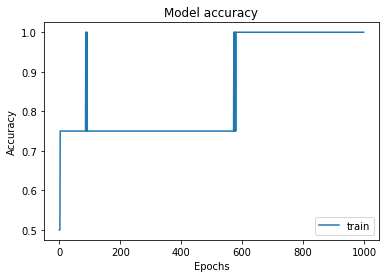

In [113]:
plt.plot(fit_log.history['accuracy'], label = 'train')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [114]:
pred = model.predict(data_train)
print(pred)

# 1 if >=0.5
# 0 otherwise


[[0.1412353 ]
 [0.30625582]
 [0.32880753]
 [0.568026  ]]


In [115]:
#teaching signal for separating hyperplane

t1 = data_train[ class_train==1 ]
t0 = data_train[ class_train==0 ]
t1_x = t1[:, 0]
t1_y = t1[:, 1]
t0_x = t0[:, 0]
t0_y = t0[:, 1]


In [116]:
g = np.loadtxt('../data/grid01_21x21.csv', delimiter=',')

# Loading g grid points to the model, then convert to a 1d array
pred_g = model.predict(g)[:, 0]
g1 = g[ pred_g >= 0.5 ]
g0 = g[ pred_g < 0.5 ]
g1_x = g1[:, 0]
g1_y = g1[:, 1]
g0_x = g0[:, 0]
g0_y = g0[:, 1]



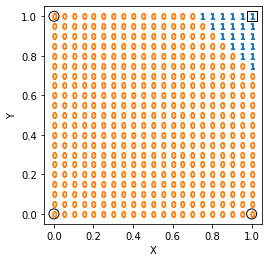

In [117]:
plt.scatter(t1_x, t1_y, marker='s', facecolor='none', edgecolor='black', s=100)
plt.scatter(t0_x, t0_y, marker='o', facecolor='none', edgecolors='black',s=100)
plt.scatter(g1_x, g1_y,marker='$1$')
plt.scatter(g0_x, g0_y,marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()